<a href="https://colab.research.google.com/github/Noiceboi/ANN/blob/SHL-Challenge/ABC_Challenge_training_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
!git clone https://github.com/<Noiceboi>/<AN>.git
!cd <AN>

/bin/bash: line 1: Noiceboi: No such file or directory
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `cd <AN>'


Bước 1: Load Dataset

Bước 2: Feature extraction

- Không có đủ kiến thức để ứng dụng feature vô trong mô hình phân loại.
- Giả thiết của chúng em:
+ Data Segmentation: Cắt đoạn dữ liệu thành từng đoạn nhỏ ngẫu nhiên theo chiều ngang và theo nhóm để code có thể chạy được.
+ So sánh độ biến thiên của các dữ liệu: Acc, Mag, Gyro. Để đưa ra đánh giá sơ bộ cho việc phân loại.
+ Vẽ đồ thị FFT (với timeseries là chiều ngang của dataframe).
+ So sánh độ biến thiên: Vẽ boxplot để đưa ra góc nhìn sơ bộ về thống kê mô tả của từng label.
+ Đánh giá label: Dựa trên boxplot, chúng em sẽ đánh giá các label thành các hành động tương ứng theo bảng sau.


Bước 3: Sử dụng model Classification để phân loại.
Sử dụng model CatBoost để phân loại label và tự động gắn nhãn hành động với label tương ứng.

Bước 4: show kết quả.


1) Bước 1

In [ ]:
from google.colab import drive

# Gắn Google Drive
drive.mount('/content/drive')

# Đọc file CSV từ Google Drive
df = pd.read_csv('/content/drive/My Drive/ABC_Challenge/dataset_challenge_train.csv')
df.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Acc_x0,Acc_x1,Acc_x2,Acc_x3,Acc_x4,Acc_x5,Acc_x6,Acc_x7,Acc_x8,...,Gyr_z491,Gyr_z492,Gyr_z493,Gyr_z494,Gyr_z495,Gyr_z496,Gyr_z497,Gyr_z498,Gyr_z499,label
0,126070,-0.156893,-0.135869,-0.137945,-0.131983,-0.137972,-0.139752,-0.155028,-0.141808,-0.149344,...,-0.000597,-0.001778,-0.002443,-0.003112,-0.002443,-0.002443,-0.001848,-0.003546,-0.004887,0.0
1,142218,0.590089,0.628386,0.657070,0.691358,0.704959,0.710535,0.731557,0.741503,0.737414,...,0.020659,0.015882,0.011893,0.006855,0.001112,-0.002674,-0.006363,-0.011114,-0.014661,0.0
2,176268,6.228702,6.230731,6.238218,6.228599,6.224925,6.209545,6.228723,6.219095,6.213552,...,-0.005948,-0.003791,-0.003808,-0.003600,-0.003665,-0.003600,-0.002877,-0.002509,-0.002443,0.0
3,62983,-7.383718,-7.403147,-7.412201,-7.402750,-7.392784,-7.374141,-7.373639,-7.354713,-7.345411,...,-0.000303,0.000962,0.003051,0.004496,0.004887,0.004887,0.003960,0.001737,-0.000590,0.0
4,187547,-0.589384,-0.576495,-0.492069,-0.475188,-0.534350,-0.477239,-0.331289,-0.423272,-0.472845,...,-0.018326,-0.018123,-0.008780,-0.006315,-0.008552,-0.009584,-0.004960,-0.004311,-0.008199,3.0
5,185173,-3.574537,-3.648726,-3.516397,-3.435736,-2.999428,-3.141123,-3.317462,-3.471040,-3.430484,...,0.081308,0.062784,0.047144,0.047466,0.051509,0.055882,0.072369,0.081246,0.087880,3.0
6,3479,-0.377447,-0.392649,-0.386505,-0.353745,-0.304096,-0.242279,-0.147775,-0.043384,0.042463,...,0.061133,0.055064,0.047215,0.040479,0.035411,0.030337,0.024720,0.017420,0.007577,4.0
7,88943,-9.758766,-9.743170,-9.741338,-9.747436,-9.776953,-9.768343,-9.754393,-9.776188,-9.749189,...,-0.001946,0.002942,-0.003180,-0.007082,-0.005861,-0.005865,-0.004638,-0.006109,-0.006351,0.0
8,98282,0.239420,0.248997,0.268151,0.260460,0.271966,0.258574,0.226001,0.216478,0.172383,...,-0.003933,-0.004618,-0.002718,-0.003942,-0.006109,-0.007330,-0.007330,-0.007578,-0.008275,0.0
9,155186,-1.047852,-1.015141,-1.002796,-0.995614,-0.864275,-0.830902,-0.899194,-0.945996,-1.006942,...,-0.015086,-0.022146,-0.024196,-0.019250,-0.008135,0.001672,0.012217,0.012217,0.018496,4.0


2) Bước 2: Feature Extraction

2.1) Data Segmentation

In [ ]:
# Chia dữ liệu thành các nhóm Acc, Mag, Gyr
acc_cols = [col for col in df.columns if 'Acc' in col]
mag_cols = [col for col in df.columns if 'Mag' in col]
gyr_cols = [col for col in df.columns if 'Gyr' in col]


In [ ]:

# Loại bỏ cột 'Unnamed' nếu có
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Hiển thị dữ liệu ban đầu
print(df.head())


     Acc_x0    Acc_x1    Acc_x2    Acc_x3    Acc_x4    Acc_x5    Acc_x6  \
0 -0.156893 -0.135869 -0.137945 -0.131983 -0.137972 -0.139752 -0.155028   
1  0.590089  0.628386  0.657070  0.691358  0.704959  0.710535  0.731557   
2  6.228702  6.230731  6.238218  6.228599  6.224925  6.209545  6.228723   
3 -7.383718 -7.403147 -7.412201 -7.402750 -7.392784 -7.374141 -7.373639   
4 -0.589384 -0.576495 -0.492069 -0.475188 -0.534350 -0.477239 -0.331289   

     Acc_x7    Acc_x8    Acc_x9  ...  Gyr_z491  Gyr_z492  Gyr_z493  Gyr_z494  \
0 -0.141808 -0.149344 -0.153229  ... -0.000597 -0.001778 -0.002443 -0.003112   
1  0.741503  0.737414  0.769834  ...  0.020659  0.015882  0.011893  0.006855   
2  6.219095  6.213552  6.215348  ... -0.005948 -0.003791 -0.003808 -0.003600   
3 -7.354713 -7.345411 -7.346518  ... -0.000303  0.000962  0.003051  0.004496   
4 -0.423272 -0.472845 -0.400838  ... -0.018326 -0.018123 -0.008780 -0.006315   

   Gyr_z495  Gyr_z496  Gyr_z497  Gyr_z498  Gyr_z499  label  
0 -0.00

In [ ]:
import numpy as np

segment_length = 128

def segment_data(data, segment_length):
    segments = []
    labels = []
    for label in data['label'].unique():
        subset = data[data['label'] == label]
        for start in range(0, len(subset), segment_length):
            end = start + segment_length
            if end <= len(subset):
                segment = subset.iloc[start:end]
                segments.append(segment)
                labels.append(label)
    return segments, labels

segments, labels = segment_data(df, segment_length)
print(f'Number of segments: {len(segments)}')


Number of segments: 91


2.2 Vẽ đồ thị FFT

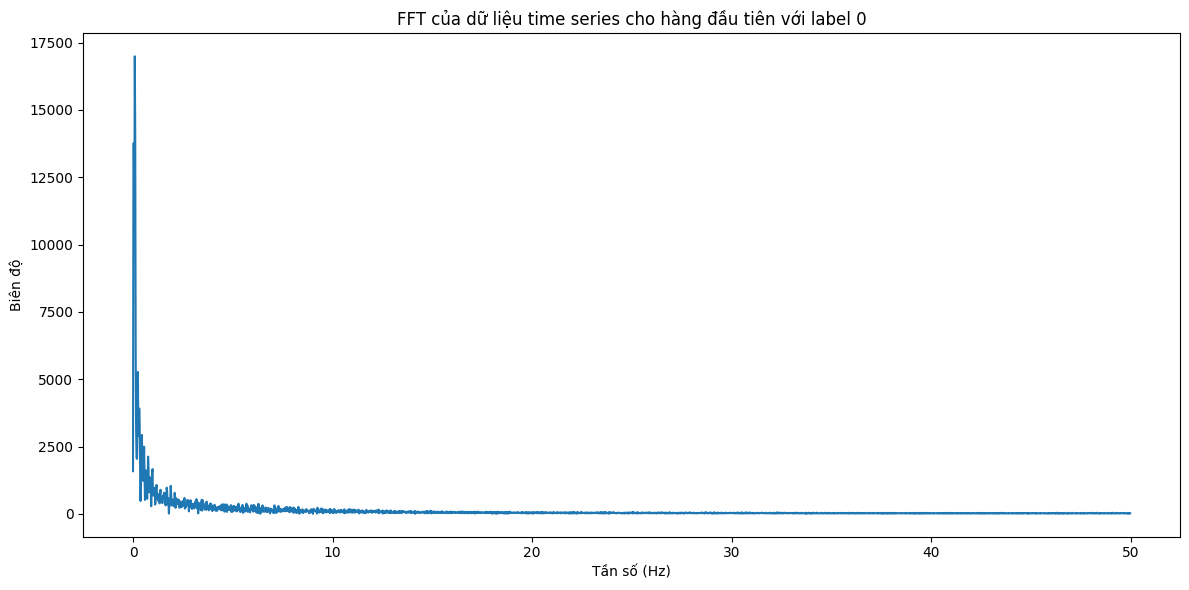

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Lọc dòng dữ liệu có nhãn là 1 (thay vì nhãn 0)
row_label_1 = df[df['label'] == 1].iloc[0]



# Lấy dữ liệu time series theo chiều ngang (bỏ qua cột 'label')
time_series_data = row_label_1[1:].values

# Giả sử tín hiệu được lấy mẫu với tần số cố định fs
fs = 100  # Tần số mẫu (Hz)
N = len(time_series_data)  # Số mẫu tín hiệu (số cột tín hiệu)

# Thực hiện FFT
fft_values = np.abs(np.fft.fft(time_series_data))
frequencies = np.fft.fftfreq(N, d=1/fs)

# Vẽ đồ thị FFT
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:N//2], fft_values[:N//2])  # Chỉ lấy phần tần số dương
plt.title('FFT của dữ liệu time series cho hàng đầu tiên với label 0')
plt.xlabel('Tần số (Hz)')
plt.ylabel('Biên độ')
plt.tight_layout()
plt.show()


2.3) Vẽ boxplot

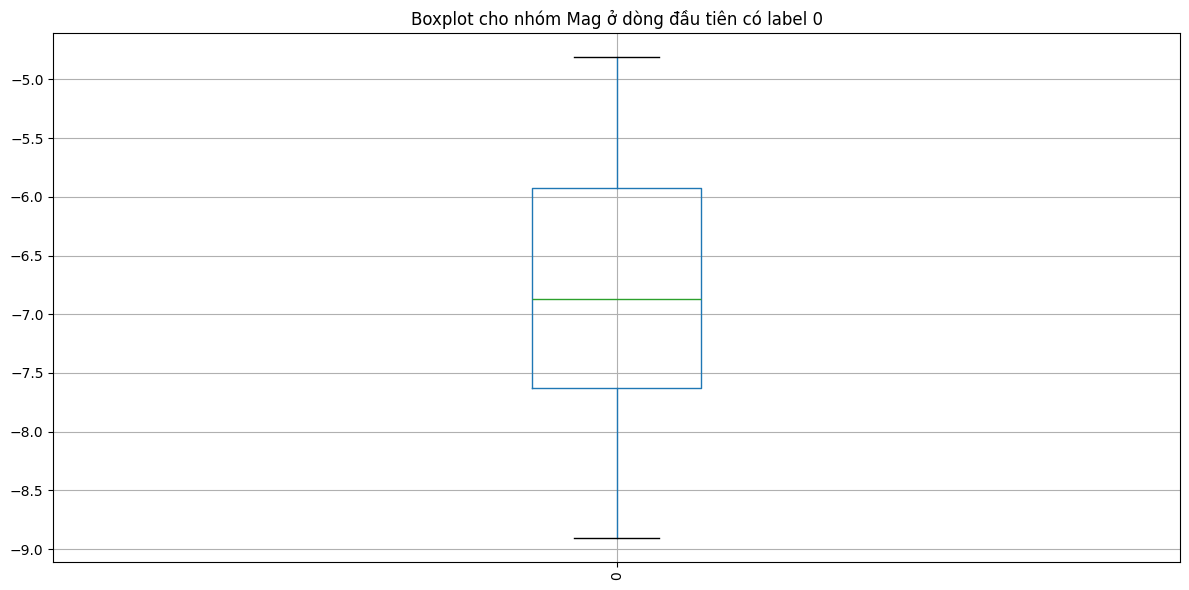

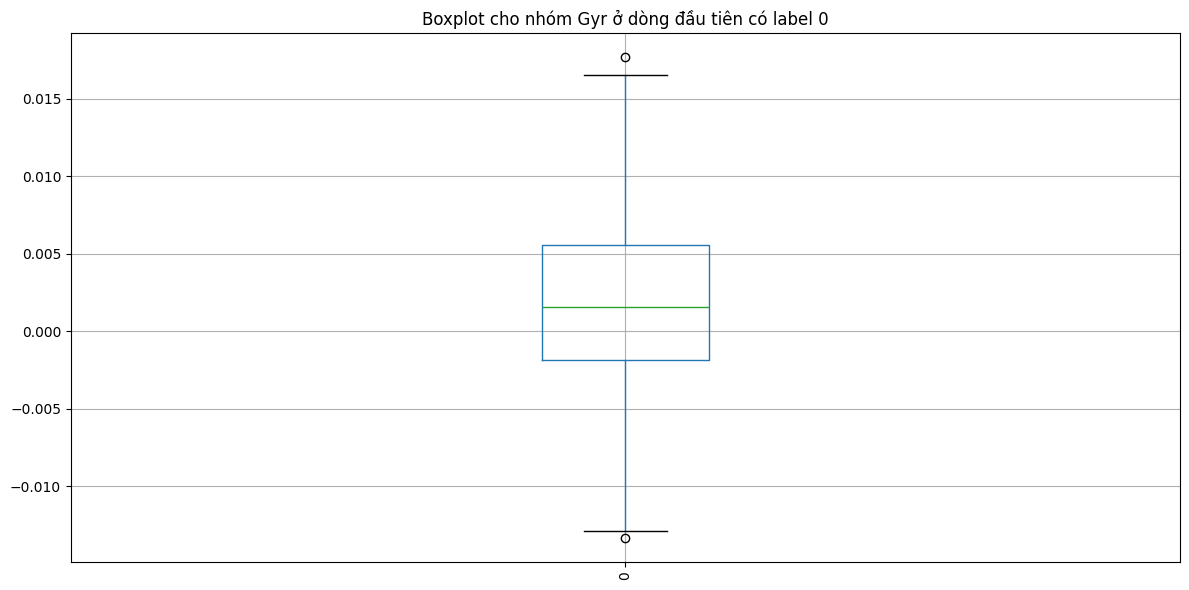

In [ ]:
# Lọc dòng dữ liệu có label là 0
if 0 in df['label'].unique():
    row_label_0 = df[df['label'] == 0].iloc[0]

    # Tạo DataFrame mới chứa dữ liệu của dòng đầu tiên
    row_data = row_label_0[1:].to_frame().T

    # Chia dữ liệu thành các nhóm Acc, Mag, Gyr
    acc_cols = [col for col in df.columns if 'Acc' in col]
    mag_cols = [col for col in df.columns if 'Mag' in col]
    gyr_cols = [col for col in df.columns if 'Gyr' in col]


    # Tạo Boxplot cho nhóm Mag
    plt.figure(figsize=(12, 6))
    row_data[mag_cols].T.boxplot()
    plt.title('Boxplot cho nhóm Mag ở dòng đầu tiên có label 0')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Tạo Boxplot cho nhóm Gyr
    plt.figure(figsize=(12, 6))
    row_data[gyr_cols].T.boxplot()
    plt.title('Boxplot cho nhóm Gyr ở dòng đầu tiên có label 0')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Không tìm thấy label 0 trong dữ liệu.")


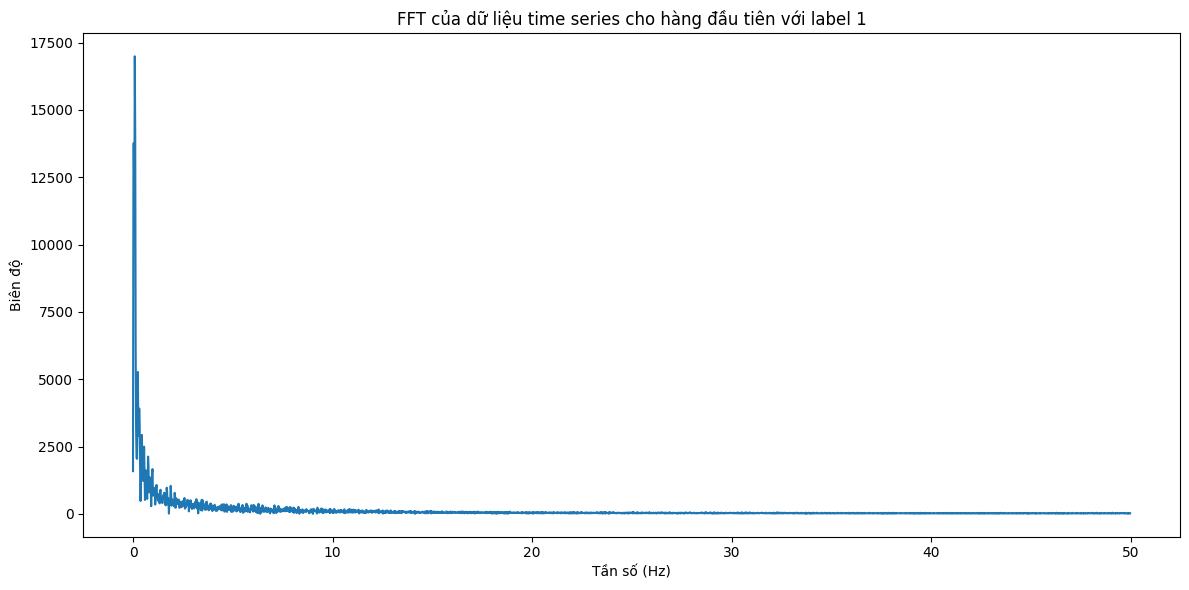

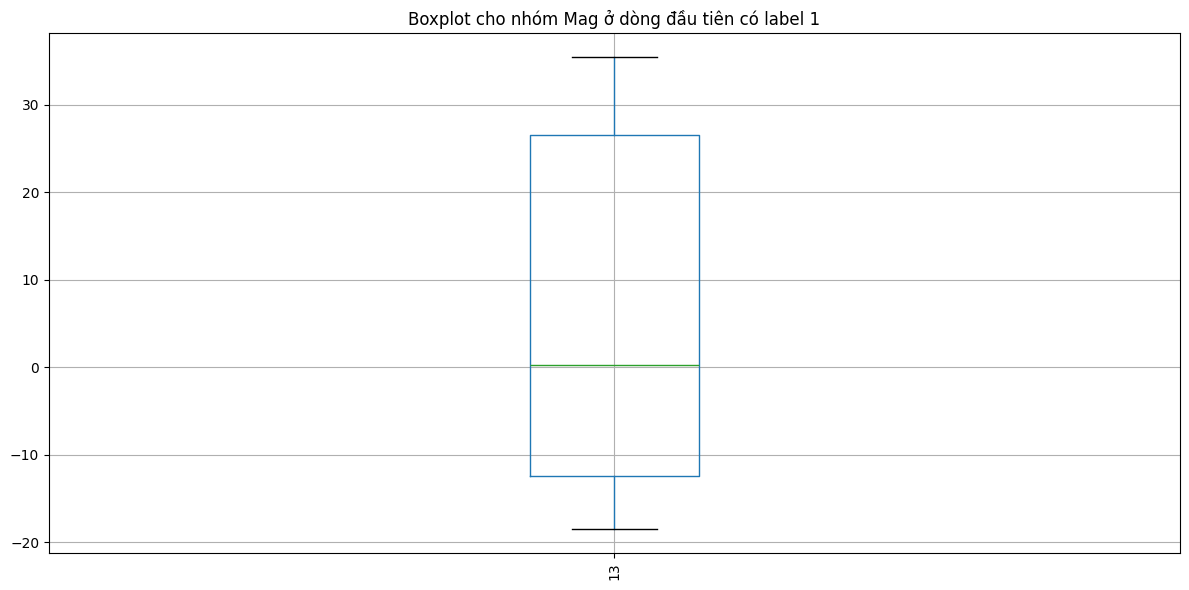

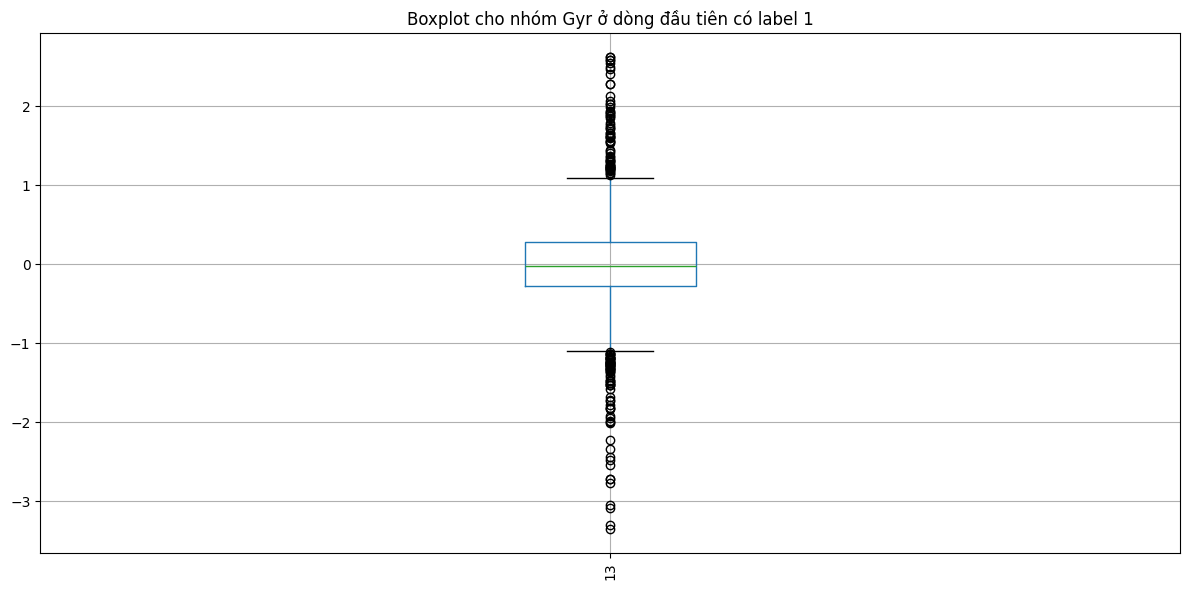

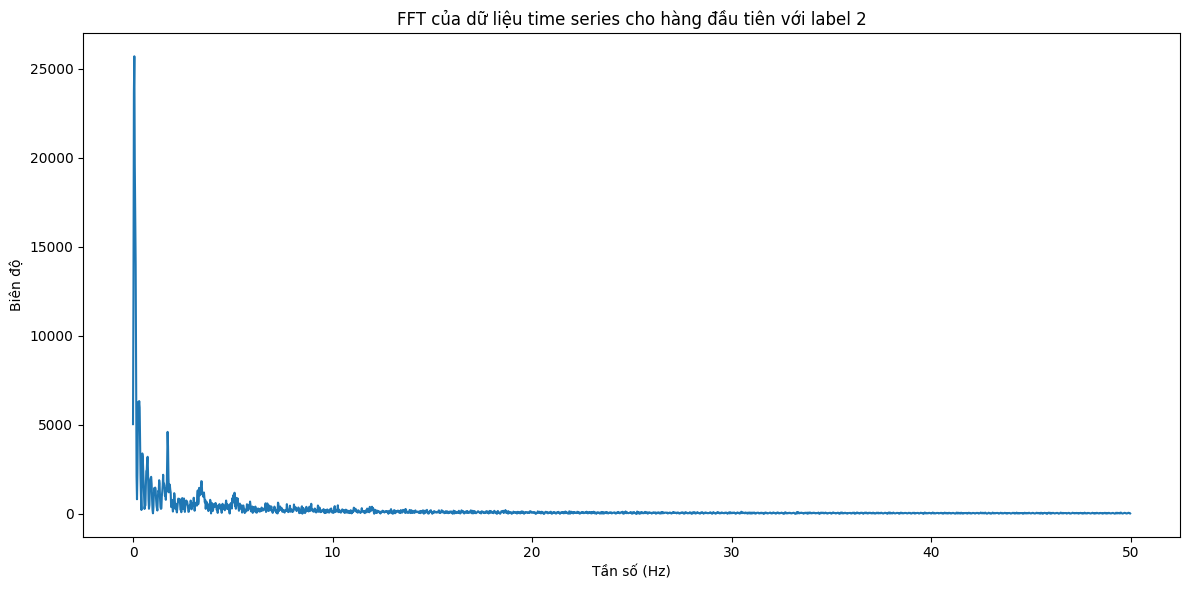

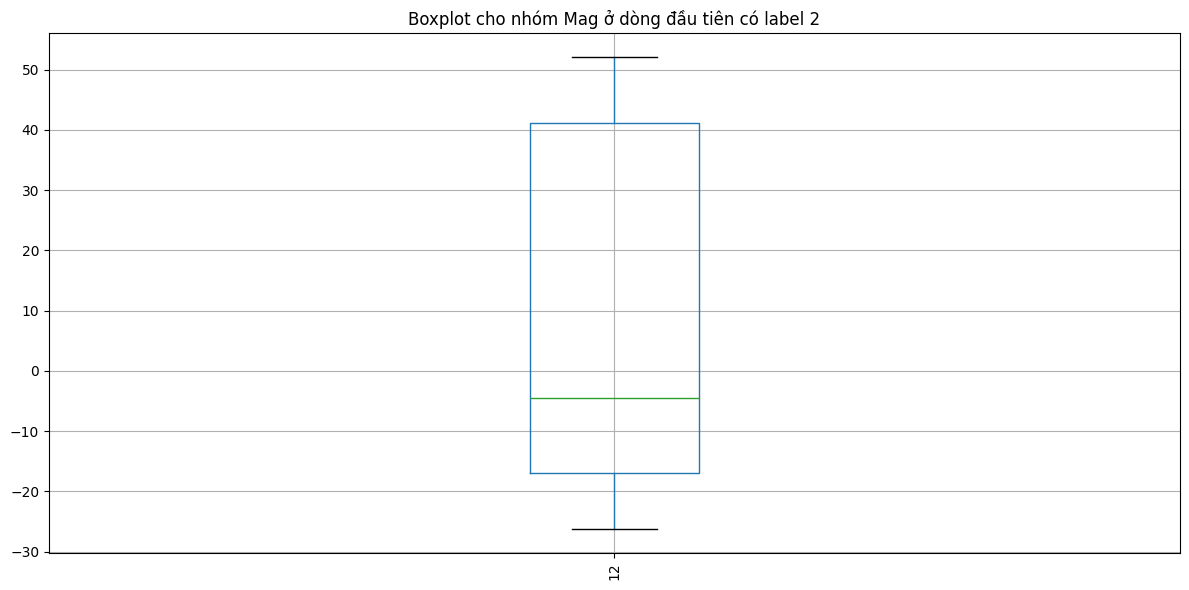

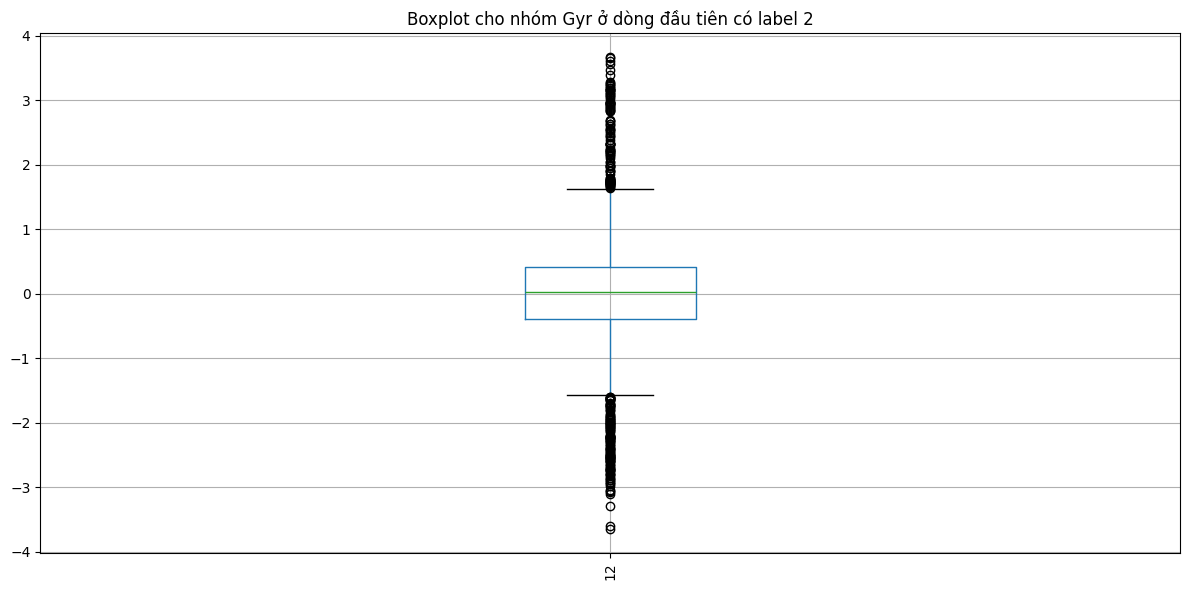

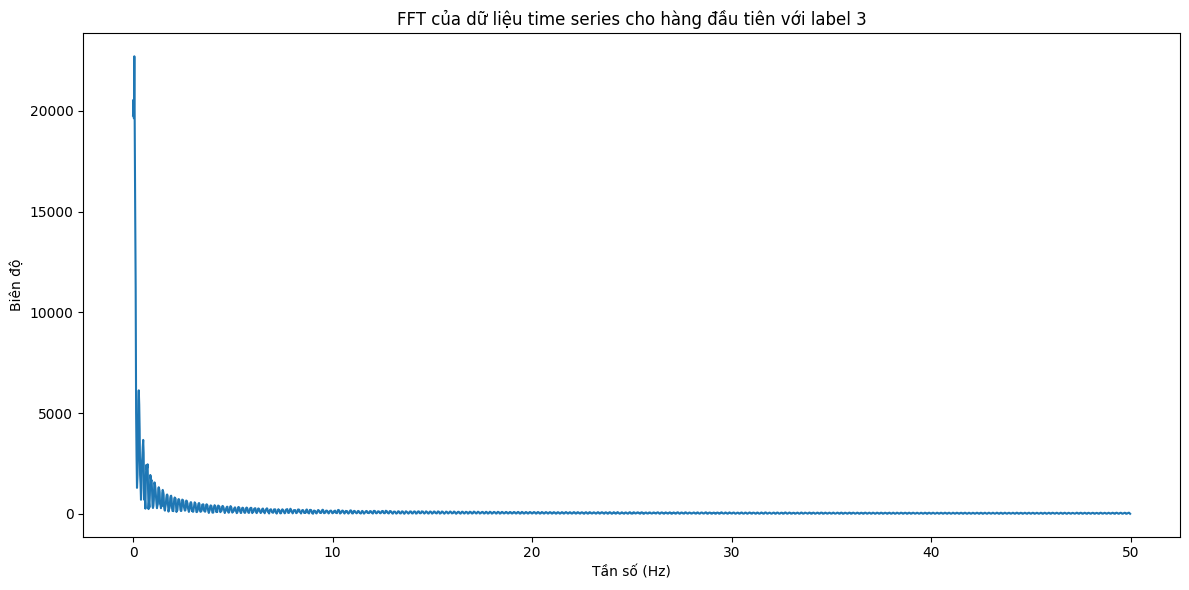

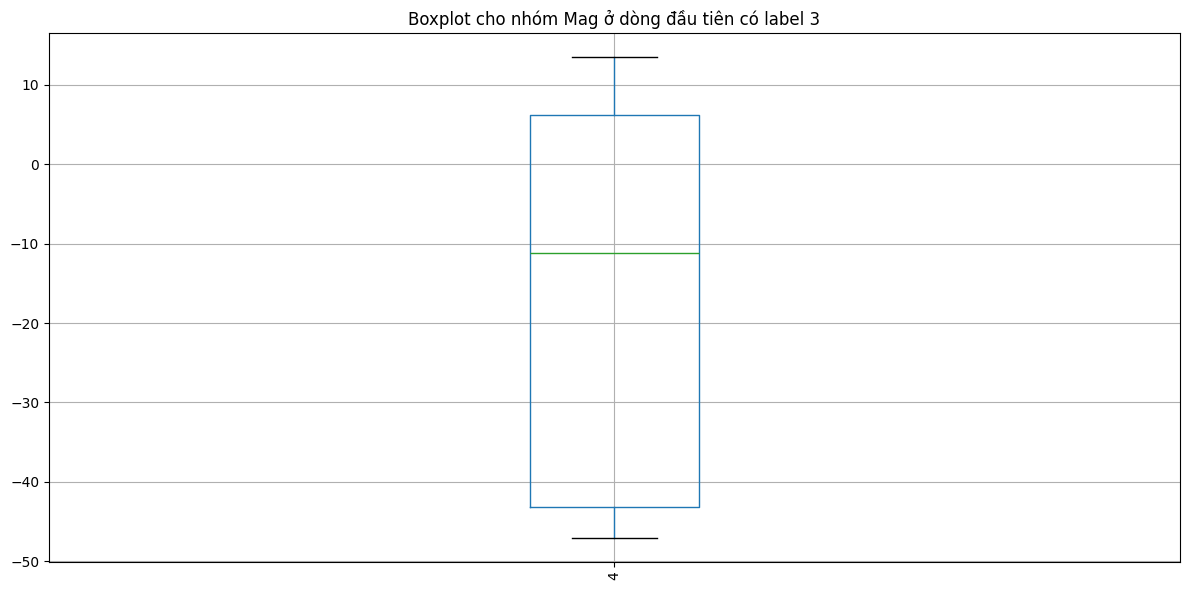

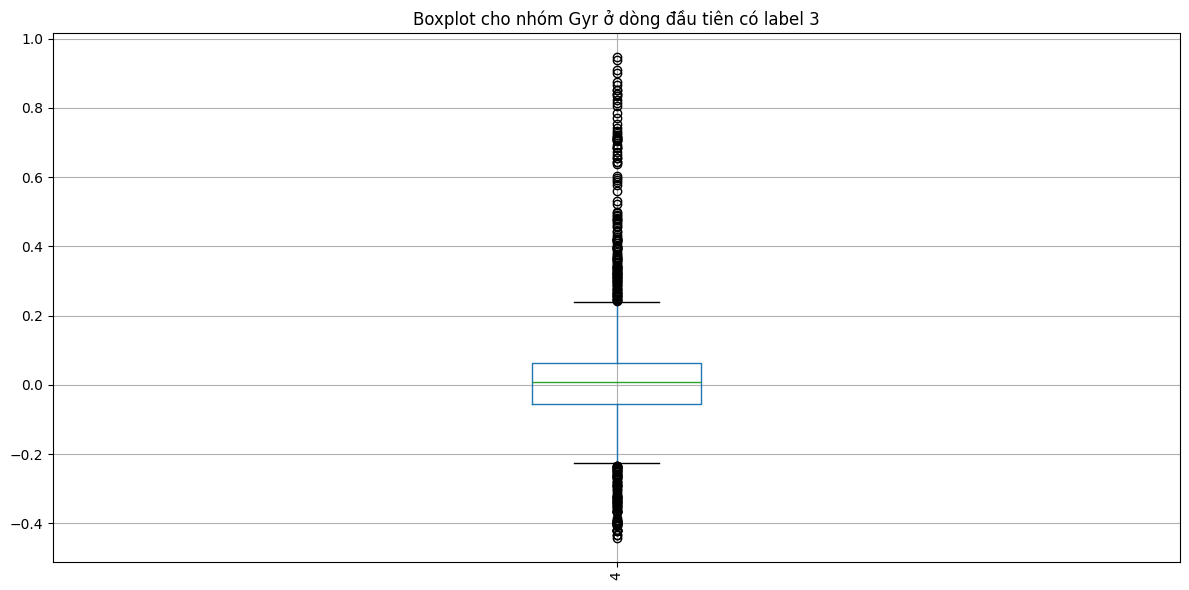

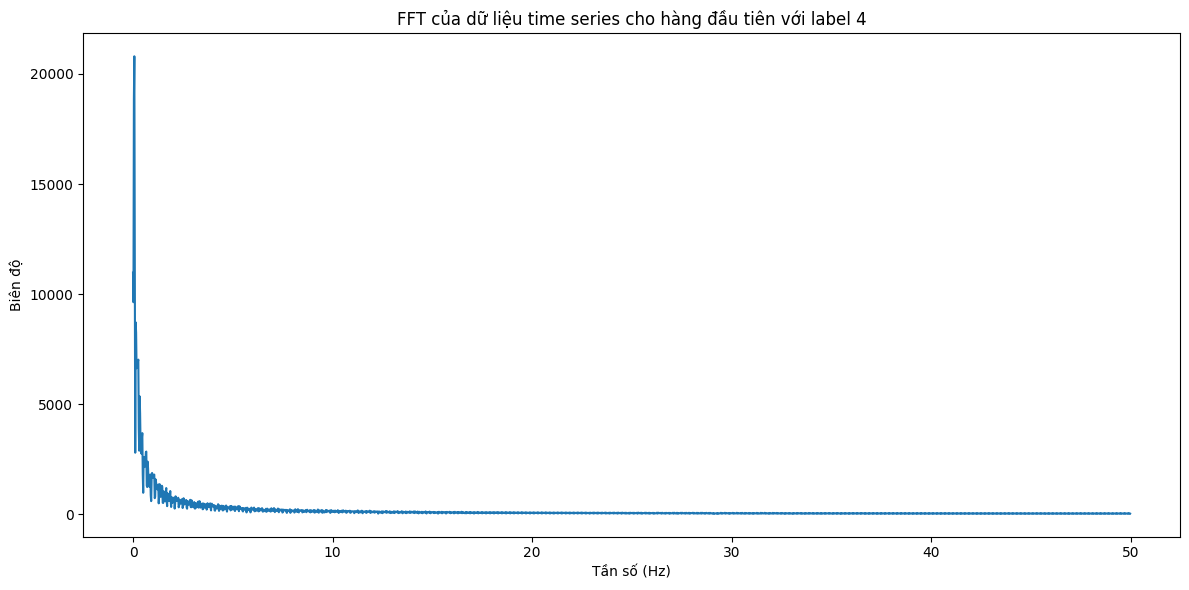

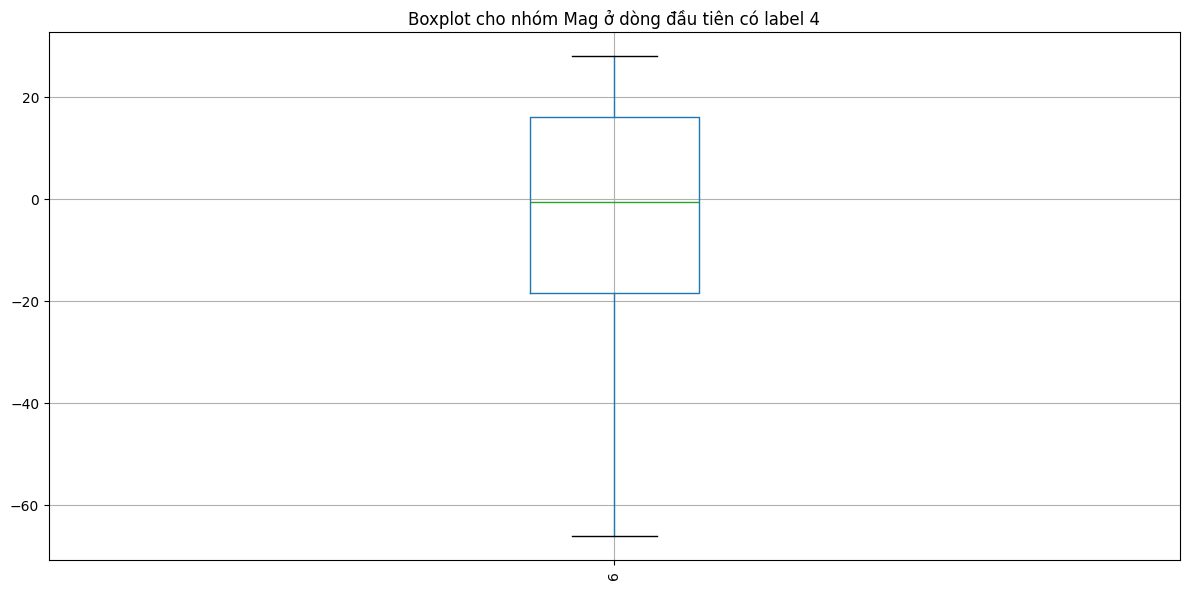

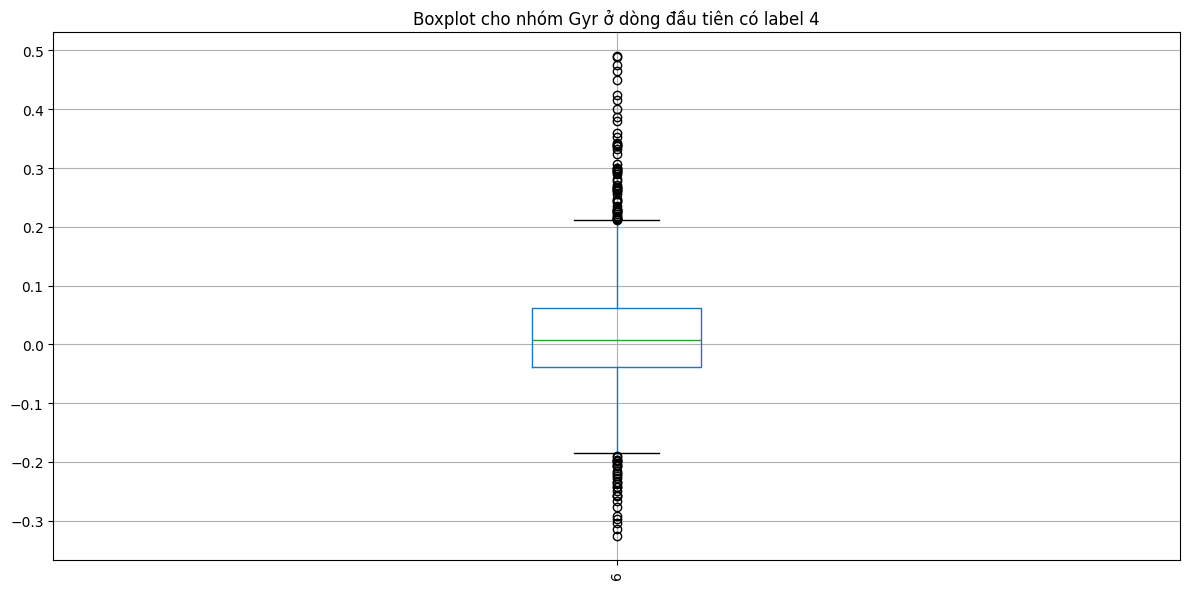

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fft_and_boxplot(df, label):
    # Lọc dòng dữ liệu có nhãn là label
    if label in df['label'].unique():
        row_label = df[df['label'] == label].iloc[0]

        # Lấy dữ liệu time series theo chiều ngang (bỏ qua cột 'label')
        time_series_data = row_label[1:].values

        # Giả sử tín hiệu được lấy mẫu với tần số cố định fs
        fs = 100  # Tần số mẫu (Hz)
        N = len(time_series_data)  # Số mẫu tín hiệu (số cột tín hiệu)

        # Thực hiện FFT
        fft_values = np.abs(np.fft.fft(time_series_data))
        frequencies = np.fft.fftfreq(N, d=1/fs)

        # Vẽ đồ thị FFT
        plt.figure(figsize=(12, 6))
        plt.plot(frequencies[:N//2], fft_values[:N//2])  # Chỉ lấy phần tần số dương
        plt.title(f'FFT của dữ liệu time series cho hàng đầu tiên với label {label}')
        plt.xlabel('Tần số (Hz)')
        plt.ylabel('Biên độ')
        plt.tight_layout()
        plt.show()

        # Tạo DataFrame mới chứa dữ liệu của dòng đầu tiên
        row_data = row_label[1:].to_frame().T

        # Chia dữ liệu thành các nhóm Acc, Mag, Gyr
        acc_cols = [col for col in df.columns if 'Acc' in col]
        mag_cols = [col for col in df.columns if 'Mag' in col]
        gyr_cols = [col for col in df.columns if 'Gyr' in col]


        # Tạo Boxplot cho nhóm Mag
        plt.figure(figsize=(12, 6))
        row_data[mag_cols].T.boxplot()
        plt.title(f'Boxplot cho nhóm Mag ở dòng đầu tiên có label {label}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        # Tạo Boxplot cho nhóm Gyr
        plt.figure(figsize=(12, 6))
        row_data[gyr_cols].T.boxplot()
        plt.title(f'Boxplot cho nhóm Gyr ở dòng đầu tiên có label {label}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Không tìm thấy label {label} trong dữ liệu.")
for label in [1, 2, 3, 4]:
    plot_fft_and_boxplot(df, label)


Kết luận: Dựa trên boxplot, chúng ta có thể định danh được từng hành động tương ứng với độ biến thiên biên độ. Nhưng do chúng em chưa đủ kiến thức, chưa thể hoàn thành được phần phân loại hành động dựa trên box plot.

3) Sử dụng model Classification: Catboost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [14]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Giả sử 'label' là cột nhãn
X = df.drop(columns=['label'])  # Tính năng
y = df['label']  # Nhãn

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình CatBoost
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred))

KeyboardInterrupt: 

*Mở rộng: Tuy chưa thể ứng dụng được những code dưới đây nhưng đây là công sức tụi em làm được thêm trong quá trình tìm hiểu


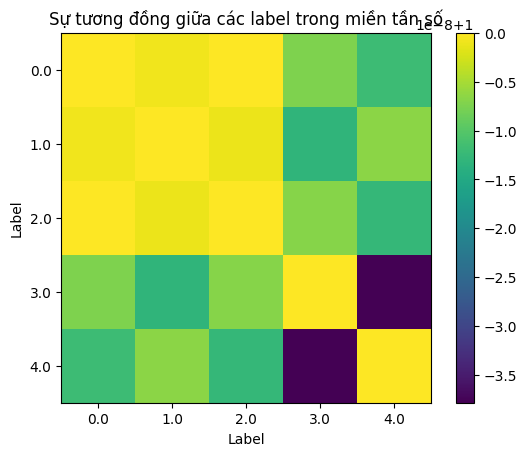

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Tính trung bình miền tần số cho mỗi label
unique_labels = np.unique(labels)
label_freq_mean = {}

for label in unique_labels:
    label_indices = np.where(labels == label)[0]
    mean_spectrum = np.mean(fft_magnitude[label_indices, :], axis=0)
    label_freq_mean[label] = mean_spectrum

# So sánh sự tương đồng giữa các label (dùng cosine similarity)
label_similarity = cosine_similarity(list(label_freq_mean.values()))

# Hiển thị ma trận tương đồng
plt.imshow(label_similarity, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title("Sự tương đồng giữa các label trong miền tần số")
plt.xlabel("Label")
plt.ylabel("Label")
plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
plt.yticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)
plt.show()


In [ ]:
# Tính tần số mẫu (giả sử tín hiệu được lấy mẫu với tần số cố định fs)
fs = 100  # Tần số mẫu (Hz), bạn thay giá trị này bằng tần số mẫu thực tế
N = signals.shape[1]  # Số mẫu tín hiệu (số cột tín hiệu)
freqs = np.fft.fftfreq(N, d=1/fs)  # Tính các tần số tương ứng (bao gồm cả âm)

# Lấy tần số trội chính xác
dominant_freqs_real = freqs[np.argmax(fft_magnitude[:, :N//2], axis=1)]  # Chỉ lấy phần tần số dương

# In tần số trội cho từng label
for label in unique_labels:
    label_indices = np.where(labels == label)[0]
    label_dominant_freqs = dominant_freqs_real[label_indices]
    print(f"Label {label} - Tần số trội phổ biến: {np.mean(label_dominant_freqs):.2f} Hz")


Label 0.0 - Tần số trội phổ biến: 1.89 Hz
Label 1.0 - Tần số trội phổ biến: 2.62 Hz
Label 2.0 - Tần số trội phổ biến: 2.05 Hz
Label 3.0 - Tần số trội phổ biến: 3.96 Hz
Label 4.0 - Tần số trội phổ biến: 1.82 Hz


In [ ]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tsfel

# Giả sử bạn đã tải dữ liệu vào DataFrame df
# df = pd.read_csv('/content/drive/My Drive/Datasets/dataset_challenge_train.csv')

# 1. Lấy dữ liệu từ các cột cảm biến (giả sử bạn có các cột Acc_x, Acc_y, Acc_z)
acc_columns = [col for col in df.columns if 'Acc_' in col]  # Lấy các cột cảm biến gia tốc
acc_data = df[acc_columns]

# 2. Cấu hình các đặc trưng cần trích xuất
cfg_file = tsfel.get_features_by_domain()  # Lấy tất cả các đặc trưng theo miền

# 3. Trích xuất đặc trưng cho từng cột cảm biến
features_list = []
for column in acc_data.columns:
    # Trích xuất đặc trưng cho mỗi cột
    features = tsfel.time_series_features_extractor(cfg_file, acc_data[column].values, fs=100, verbose=0)
    features['label'] = df['label']  # Thêm nhãn vào kết quả
    features_list.append(features)

# 4. Kết hợp tất cả các đặc trưng vào một DataFrame
df_features = pd.concat(features_list, axis=0)

# 5. In thông tin về các đặc trưng đã trích xuất
print("\nKích thước dataset sau khi trích xuất đặc trưng:", df_features.shape)
print("\nCác đặc trưng đã được trích xuất:")
print(df_features.columns.tolist())


Kích thước dataset sau khi trích xuất đặc trưng: (1500, 157)

Các đặc trưng đã được trích xuất:
['0_Absolute energy', '0_Area under the curve', '0_Autocorrelation', '0_Average power', '0_Centroid', '0_ECDF Percentile Count_0', '0_ECDF Percentile Count_1', '0_ECDF Percentile_0', '0_ECDF Percentile_1', '0_ECDF_0', '0_ECDF_1', '0_ECDF_2', '0_ECDF_3', '0_ECDF_4', '0_ECDF_5', '0_ECDF_6', '0_ECDF_7', '0_ECDF_8', '0_ECDF_9', '0_Entropy', '0_Fundamental frequency', '0_Histogram mode', '0_Human range energy', '0_Interquartile range', '0_Kurtosis', '0_LPCC_0', '0_LPCC_1', '0_LPCC_10', '0_LPCC_11', '0_LPCC_2', '0_LPCC_3', '0_LPCC_4', '0_LPCC_5', '0_LPCC_6', '0_LPCC_7', '0_LPCC_8', '0_LPCC_9', '0_MFCC_0', '0_MFCC_1', '0_MFCC_10', '0_MFCC_11', '0_MFCC_2', '0_MFCC_3', '0_MFCC_4', '0_MFCC_5', '0_MFCC_6', '0_MFCC_7', '0_MFCC_8', '0_MFCC_9', '0_Max', '0_Max power spectrum', '0_Maximum frequency', '0_Mean', '0_Mean absolute deviation', '0_Mean absolute diff', '0_Mean diff', '0_Median', '0_Median absolu

In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.9 MB/s eta 0:00:00


In [ ]:
df_features.describe()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_2.78Hz,0_Wavelet variance_25.0Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_3.57Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_5.0Hz,0_Wavelet variance_6.25Hz,0_Wavelet variance_8.33Hz,0_Zero crossing rate,label
count,1500.000000,1500.000000,1500.0,1500.000000,1500.000000,1500.0,1500.0,1500.000000,1500.000000,1.500000e+03,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0
mean,507558.924580,440.697758,1.0,4230.010206,60.240449,2400.0,9600.0,-6.906746,3.676854,8.333333e-05,...,39.796115,32.489355,39.892020,40.110766,40.175566,39.990628,39.755441,39.460642,5809.924667,0.0
std,137613.043466,76.257108,0.0,1146.870935,0.530917,0.0,0.0,2.138755,1.986966,1.911544e-18,...,9.934130,7.502973,10.153599,10.172920,9.817761,9.228185,8.882049,8.846054,179.139833,0.0
min,312736.477672,337.817762,1.0,2606.354510,58.355941,2400.0,9600.0,-9.597599,1.632103,8.333333e-05,...,23.668915,20.983311,23.488043,23.704975,24.408492,24.979200,25.387488,25.595613,5467.000000,0.0
25%,332754.690802,344.145689,1.0,2773.186856,59.879492,2400.0,9600.0,-9.498444,1.726171,8.333333e-05,...,26.797670,22.371760,26.438576,26.572154,27.102074,27.734525,27.951589,27.800290,5584.000000,0.0
50%,530654.479368,450.921674,1.0,4422.489202,60.225215,2400.0,9600.0,-6.922052,2.927086,8.333333e-05,...,44.935234,36.174954,45.626346,46.099303,45.957979,45.355253,44.724709,43.338019,5897.000000,0.0
75%,657257.137535,526.562634,1.0,5477.599279,60.588583,2400.0,9600.0,-4.319140,6.351480,8.333333e-05,...,47.466663,38.795920,47.571334,47.714874,47.542152,46.871340,46.459322,47.048534,5950.000000,0.0
max,688312.122221,538.739578,1.0,5736.412386,62.087939,2400.0,9600.0,-4.106709,6.565788,8.333333e-05,...,53.371580,41.252967,52.942513,52.722176,52.344759,50.650163,50.727084,50.623761,6053.000000,0.0


In [ ]:
import tsfel

# Lấy dữ liệu từ các cột cảm biến
acc_columns = [col for col in df.columns if 'Acc_' in col]
acc_data = df[acc_columns]

# Cấu hình các đặc trưng cần trích xuất
cfg_file = tsfel.get_features_by_domain()

# Trích xuất đặc trưng cho từng cột cảm biến
features_list = []
for column in acc_data.columns:
    features = tsfel.time_series_features_extractor(cfg_file, acc_data[column].values, fs=100, verbose=0)
    features['label'] = df['label']  # Thêm nhãn vào kết quả
    features_list.append(features)

# Kết hợp tất cả các đặc trưng vào một DataFrame
df_features = pd.concat(features_list, axis=0)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Tách dữ liệu thành X và y
X = df_features.drop('label', axis=1)
y = df_features['label']

# Chọn 10 đặc trưng tốt nhất
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Lấy tên các đặc trưng đã chọn
selected_features = X.columns[selector.get_support()]
print("Các đặc trưng quan trọng nhất:")
print(selected_features)

Các đặc trưng quan trọng nhất:
Index(['0_Wavelet variance_12.5Hz', '0_Wavelet variance_2.78Hz',
       '0_Wavelet variance_25.0Hz', '0_Wavelet variance_3.12Hz',
       '0_Wavelet variance_3.57Hz', '0_Wavelet variance_4.17Hz',
       '0_Wavelet variance_5.0Hz', '0_Wavelet variance_6.25Hz',
       '0_Wavelet variance_8.33Hz', '0_Zero crossing rate'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [ ]:
acc_df=df.loc[:,df.columns.str.contains('Acc_x',regex=True)]
acc_df=acc_df.loc[:5000,:]
acc_df_val=acc_df.values
label=df.loc[:5000,:]['label']
label.value_counts()

,count
label,
3.0,1138
1.0,1027
4.0,977
0.0,974
2.0,885


In [ ]:
import tsfel
cfg_file = tsfel.get_features_by_domain('statistical')
df_features_stats=None
i=0
for value in acc_df_val:
    i+=1
    df_transform_acc = tsfel.time_series_features_extractor(cfg_file, value, fs=100,verbose=0)
    if df_features_stats is None:
        print(value)
        df_features_stats=df_transform_acc
    else:
        df_features_stats=pd.concat([df_features_stats,df_transform_acc],axis=0)

i

[-0.156893 -0.135869 -0.137945 -0.131983 -0.137972 -0.139752 -0.155028
 -0.141808 -0.149344 -0.153229 -0.164623 -0.147529 -0.178104 -0.157114
 -0.180099 -0.181959 -0.193543 -0.197252 -0.201559 -0.206784 -0.21069
 -0.220267 -0.231689 -0.21069  -0.189394 -0.185853 -0.185859 -0.160752
 -0.170614 -0.189765 -0.220267 -0.216367 -0.237623 -0.270259 -0.262476
 -0.284831 -0.268151 -0.248997 -0.225944 -0.227661 -0.222305 -0.191536
 -0.19932  -0.187638 -0.189746 -0.18976  -0.172383 -0.174205 -0.13727
 -0.210434 -0.170551 -0.193311 -0.185836 -0.205006 -0.220267 -0.220267
 -0.241471 -0.216404 -0.216378 -0.21638  -0.197536 -0.185848 -0.160757
 -0.180074 -0.161057 -0.174288 -0.195419 -0.201113 -0.191536 -0.212467
 -0.204803 -0.208861 -0.218161 -0.208925 -0.189767 -0.195455 -0.21069
 -0.191536 -0.222111 -0.196927 -0.252567 -0.18974  -0.189458 -0.19541
 -0.208014 -0.223821 -0.229843 -0.245105 -0.233719 -0.233745 -0.212671
 -0.180169 -0.172383 -0.195419 -0.231937 -0.254685 -0.275962 -0.283418
 -0.283414

5001

In [ ]:
df_features_stats.columns=['Accelerate'+x[1:] for x in df_features_stats.columns]

df_features_stats

,Accelerate_Absolute energy,Accelerate_Average power,Accelerate_ECDF Percentile Count_0,Accelerate_ECDF Percentile Count_1,Accelerate_ECDF Percentile_0,Accelerate_ECDF Percentile_1,Accelerate_ECDF_0,Accelerate_ECDF_1,Accelerate_ECDF_2,Accelerate_ECDF_3,...,Accelerate_Mean,Accelerate_Mean absolute deviation,Accelerate_Median,Accelerate_Median absolute deviation,Accelerate_Min,Accelerate_Peak to peak distance,Accelerate_Root mean square,Accelerate_Skewness,Accelerate_Standard deviation,Accelerate_Variance
0,26.890780,5.388934,100.0,400.0,-0.264250,-0.195419,0.002,0.004,0.006,0.008,...,-0.228741,0.031144,-0.229843,0.026911,-0.325611,0.193628,0.231909,0.097397,0.038199,0.001459
0,209.630747,42.010170,100.0,400.0,0.612916,0.683716,0.002,0.004,0.006,0.008,...,0.643359,0.047320,0.654905,0.023527,0.316035,0.494319,0.647504,-1.620488,0.073151,0.005351
0,19368.315889,3881.426030,100.0,400.0,6.213552,6.233971,0.002,0.004,0.006,0.008,...,6.223864,0.009522,6.223118,0.007678,6.192087,0.074878,6.223876,0.264671,0.012007,0.000144
0,27460.263187,5503.058755,100.0,400.0,-7.432140,-7.384203,0.002,0.004,0.006,0.008,...,-7.410782,0.023004,-7.412448,0.019154,-7.479486,0.180868,7.410838,0.472000,0.028954,0.000838
0,999.580012,200.316636,100.0,400.0,-1.645883,-0.838963,0.002,0.004,0.006,0.008,...,-1.223978,0.502162,-1.150444,0.268962,-3.292432,4.153905,1.413917,-0.288352,0.707840,0.501038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,14863.576142,2978.672574,100.0,400.0,-4.397645,5.469097,0.002,0.004,0.006,0.008,...,0.676105,4.365241,1.143304,3.838272,-12.326980,27.612220,5.452261,-0.060936,5.410179,29.270034
0,248.219375,49.743362,100.0,400.0,0.526724,0.638336,0.002,0.004,0.006,0.008,...,0.555673,0.195769,0.572793,0.040123,-2.083215,3.943245,0.704584,-2.462227,0.433205,0.187667
0,5048.987917,1011.821226,100.0,400.0,-3.621586,2.028184,0.002,0.004,0.006,0.008,...,-1.134681,2.722565,-1.847072,2.400519,-10.775530,14.457819,3.177731,-0.174595,2.968244,8.810474
0,1365.492867,273.645865,100.0,400.0,1.599738,1.703072,0.002,0.004,0.006,0.008,...,1.651468,0.049261,1.655575,0.043522,1.467211,0.335820,1.652569,-0.199351,0.060312,0.003638


In [ ]:
import scipy
import matplotlib.pyplot as plt
# fig 1
(f, S) = scipy.signal.periodogram(acc_df_val[1], fs=100, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,50])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
# fig 2
for signal in acc_df_val[:5]:
    (f, S) = scipy.signal.periodogram(signal, fs=100, scaling='density')
    plt.semilogy(f, S)
    plt.ylim([1e-7, 1e2])
    plt.xlim([0,50])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend()
#     plt.show()
#     break

NameError: name 'acc_df_val' is not defined

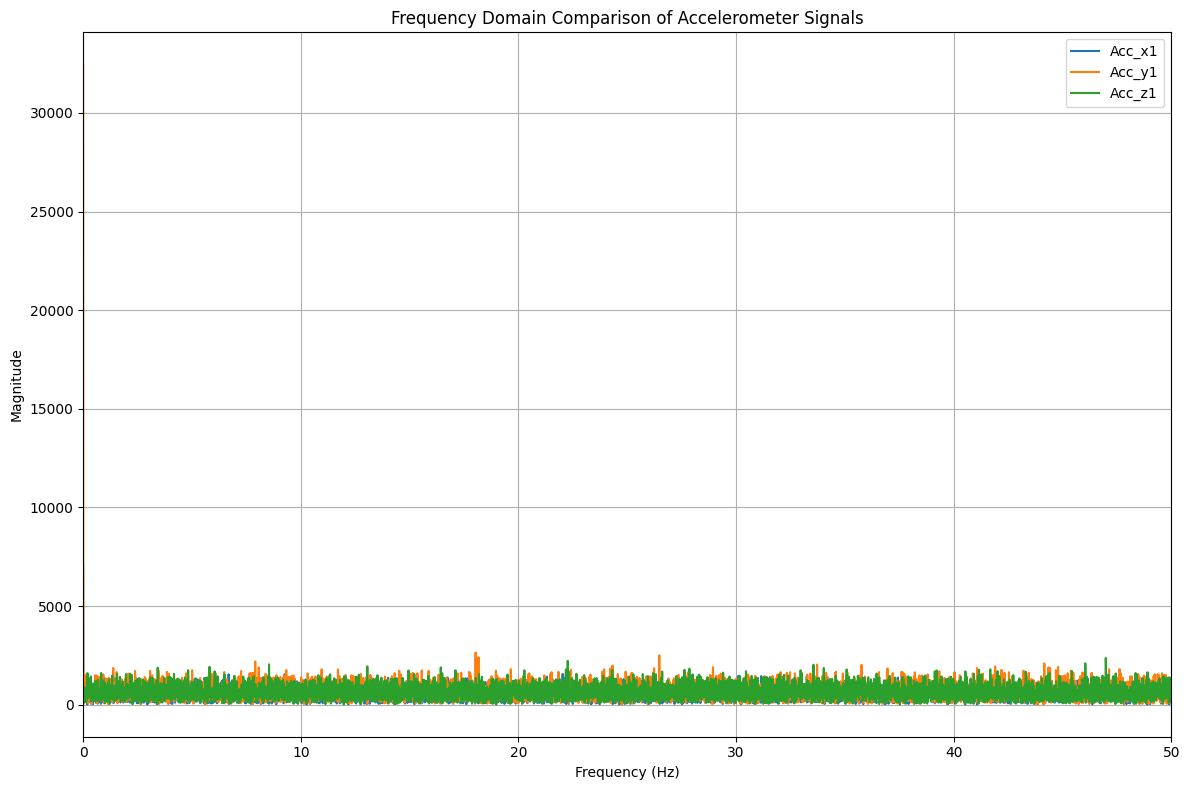

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('/content/drive/My Drive/Datasets/dataset_challenge_train.csv')

# List of accelerometer columns to analyze
acc_columns = ['Acc_x1', 'Acc_y1', 'Acc_z1']  # Replace with your actual column names

# Parameters
fs = 100  # Sampling frequency (Hz), adjust according to your dataset

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Loop through each accelerometer column
for column in acc_columns:
    # Get the signal
    signal = df[column].values

    # Apply FFT
    fft_result = np.fft.fft(signal)

    # Calculate the corresponding frequencies
    N = len(signal)
    frequencies = np.fft.fftfreq(N, d=1/fs)

    # Calculate the magnitude of the FFT result
    magnitude = np.abs(fft_result)

    # Plot the frequency domain representation
    plt.plot(frequencies[:N//2], magnitude[:N//2], label=column)  # Plot only the positive frequencies

# Customize the plot
plt.title('Frequency Domain Comparison of Accelerometer Signals')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 50)  # Limit the x-axis for better visibility
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

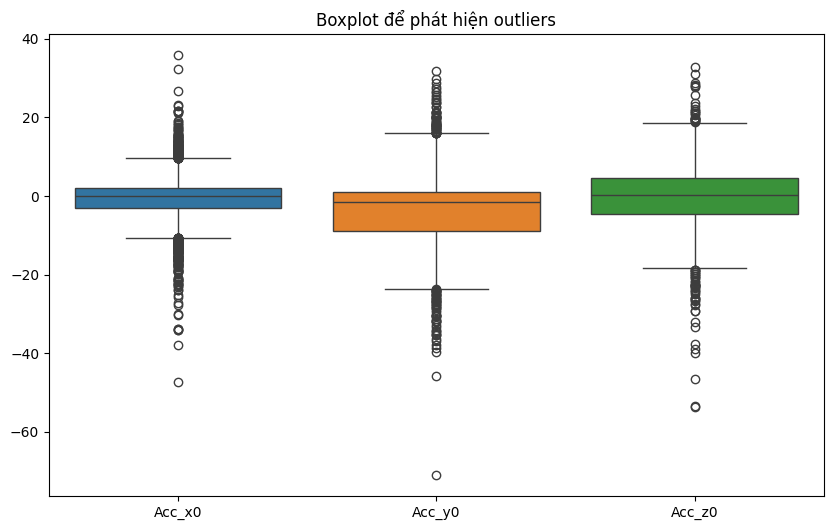

In [ ]:
# Sử dụng boxplot để phát hiện outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Acc_x0', 'Acc_y0', 'Acc_z0']])  # Thay thế bằng các cột bạn muốn kiểm tra
plt.title('Boxplot để phát hiện outliers')
plt.show()

# Xử lý outliers (ví dụ: loại bỏ hoặc thay thế)
# df = df[(df['Acc_x0'] < upper_limit) & (df['Acc_x0'] > lower_limit)]  # Giới hạn upper_limit và lower_limit cần được xác định

In [ ]:
# Kiểm tra các phương thức đã được sử dụng
print("Các phương thức có thể đã được sử dụng để xử lý dữ liệu missing:")

# Kiểm tra xem có sử dụng fillna không
if 'fillna' in str(df):
    print("- fillna() có thể đã được sử dụng.")

# Kiểm tra xem có sử dụng dropna không
if 'dropna' in str(df):
    print("- dropna() có thể đã được sử dụng.")

# Kiểm tra xem có sử dụng interpolate không
if 'interpolate' in str(df):
    print("- interpolate() có thể đã được sử dụng.")

# Kiểm tra các giá trị thống kê
print("\nThông tin thống kê của DataFrame:")
print(df.describe())

Các phương thức có thể đã được sử dụng để xử lý dữ liệu missing:

Thông tin thống kê của DataFrame:
          Unnamed: 0        Acc_x0        Acc_x1        Acc_x2        Acc_x3  \
count   12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean    97920.084417     -0.596115     -0.587296     -0.577145     -0.559362   
std     56689.020808      5.212080      5.210394      5.223596      5.206711   
min        10.000000    -47.447456    -44.875308    -43.190339    -40.485050   
25%     49833.500000     -3.035349     -2.963384     -2.922434     -2.916742   
50%    102825.500000     -0.114587     -0.123608     -0.122619     -0.112439   
75%    147203.750000      2.045042      2.062816      2.097308      2.126298   
max    195237.000000     35.804754     28.497822     32.885242     36.013868   

             Acc_x4        Acc_x5        Acc_x6        Acc_x7        Acc_x8  \
count  12000.000000  12000.000000  12000.000000  12000.000000  12000.000000   
mean      -0.544505  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Giả sử 'label' là cột nhãn
X = df.drop(columns=['label'])  # Tính năng
y = df['label']  # Nhãn

# Bước 2: Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 3: Chọn mô hình và huấn luyện
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Bước 4: Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred))

Độ chính xác: 0.8320833333333333

Báo cáo phân loại:
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       466
         1.0       0.92      0.92      0.92       519
         2.0       0.87      0.88      0.87       410
         3.0       0.72      0.87      0.79       547
         4.0       0.86      0.69      0.77       458

    accuracy                           0.83      2400
   macro avg       0.84      0.83      0.83      2400
weighted avg       0.84      0.83      0.83      2400



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Bước 3: Chọn mô hình Logistic Regression và huấn luyện
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Bước 4: Dự đoán và đánh giá mô hình
y_pred_logistic = logistic_model.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác (Logistic Regression):", accuracy_score(y_test, y_pred_logistic))
print("\nBáo cáo phân loại (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Giả sử 'label' là cột nhãn
X = df.drop(columns=['label'])  # Tính năng
y = df['label']  # Nhãn

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình CatBoost
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred))

Độ chính xác: 0.9345833333333333

Báo cáo phân loại:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       466
         1.0       0.95      0.94      0.95       519
         2.0       0.92      0.92      0.92       410
         3.0       0.95      0.94      0.94       547
         4.0       0.94      0.94      0.94       458

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



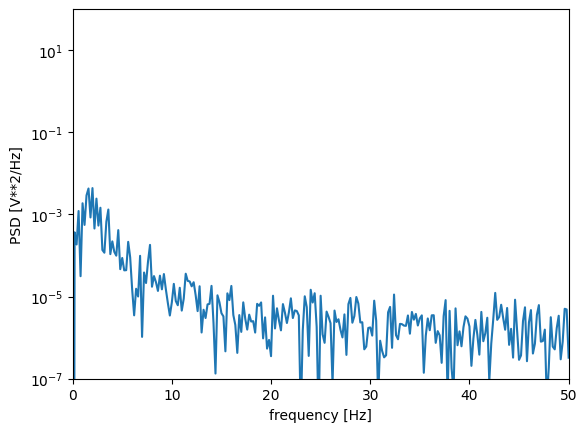

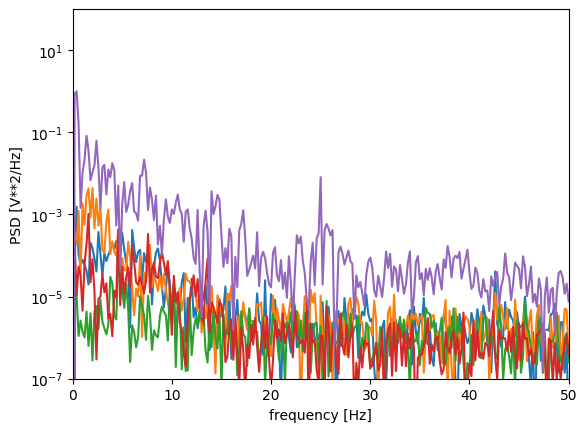

In [ ]:
import scipy
import matplotlib.pyplot as plt
acc_df=df.loc[:,df.columns.str.contains('Acc_x',regex=True)]
acc_df=acc_df.loc[:5000,:]
acc_df_val=acc_df.values
label=df.loc[:5000,:]['label']
label.value_counts()
# fig 1
(f, S) = scipy.signal.periodogram(acc_df_val[1], fs=100, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,50])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
# fig 2
for signal in acc_df_val[:5]:
    (f, S) = scipy.signal.periodogram(signal, fs=100, scaling='density')
    plt.semilogy(f, S)
    plt.ylim([1e-7, 1e2])
    plt.xlim([0,50])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
#     plt.show()
#     break

In [ ]:
pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.4 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
df_test=df.copy()
df_test=df_test[['Acc_x0','Gyr_x0','Mag_x0',
                 'Acc_y0','Gyr_y0','Mag_y0',
                 'Acc_z0','Gyr_z0','Mag_z0',
                'label']]
report = sv.analyze(df_test)
report.show_html('Report_pre_stats_extraction.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report_pre_stats_extraction.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report.show_html('Report_pre_stats_extraction.html')

Report Report_pre_stats_extraction.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#PHÂN TÍCH KỸ HƠN CÁC NHÓM LABEL
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]
df_label_2 = df[df['label'] == 2]
df_label_3 = df[df['label'] == 3]
df_label_4 = df[df['label'] == 4]

In [ ]:
print("Thống kê mô tả về dataset cho label '0':")
description_label_0 = df_label_0.describe()
print(description_label_0)
print("\nThống kê mô tả về dataset cho label '1':")
description_label_1 = df_label_1.describe()
print(description_label_1)
print("\nThống kê mô tả về dataset cho label '2':")
description_label_2 = df_label_2.describe()
print(description_label_2)
print("\nThống kê mô tả về dataset cho label '3':")
description_label_3 = df_label_3.describe()
print(description_label_3)
print("\nThống kê mô tả về dataset cho label '4':")
description_label_4 = df_label_4.describe()
print(description_label_4)

Thống kê mô tả về dataset cho label '0':
          Unnamed: 0       Acc_x0       Acc_x1       Acc_x2       Acc_x3  \
count    2345.000000  2345.000000  2345.000000  2345.000000  2345.000000   
mean    99943.036674    -0.547402    -0.548355    -0.548157    -0.543512   
std     56692.437153     4.081339     4.083265     4.084469     4.081986   
min      1585.000000   -10.622774   -10.862500   -10.081082   -10.138614   
25%     53058.000000    -2.288857    -2.296625    -2.317345    -2.308277   
50%    103371.000000    -0.298447    -0.306458    -0.306458    -0.291084   
75%    152958.000000     1.682725     1.714417     1.721159     1.718060   
max    194732.000000     9.896515     9.797073     9.812410     9.806650   

            Acc_x4       Acc_x5       Acc_x6       Acc_x7       Acc_x8  ...  \
count  2345.000000  2345.000000  2345.000000  2345.000000  2345.000000  ...   
mean     -0.536761    -0.532691    -0.532852    -0.535530    -0.540411  ...   
std       4.077723     4.074092     4

In [ ]:
df_label_0.head()

,Unnamed: 0,Acc_x0,Acc_x1,Acc_x2,Acc_x3,Acc_x4,Acc_x5,Acc_x6,Acc_x7,Acc_x8,...,Gyr_z491,Gyr_z492,Gyr_z493,Gyr_z494,Gyr_z495,Gyr_z496,Gyr_z497,Gyr_z498,Gyr_z499,label
0,126070,-0.156893,-0.135869,-0.137945,-0.131983,-0.137972,-0.139752,-0.155028,-0.141808,-0.149344,...,-0.000597,-0.001778,-0.002443,-0.003112,-0.002443,-0.002443,-0.001848,-0.003546,-0.004887,0.0
1,142218,0.590089,0.628386,0.657070,0.691358,0.704959,0.710535,0.731557,0.741503,0.737414,...,0.020659,0.015882,0.011893,0.006855,0.001112,-0.002674,-0.006363,-0.011114,-0.014661,0.0
2,176268,6.228702,6.230731,6.238218,6.228599,6.224925,6.209545,6.228723,6.219095,6.213552,...,-0.005948,-0.003791,-0.003808,-0.003600,-0.003665,-0.003600,-0.002877,-0.002509,-0.002443,0.0
3,62983,-7.383718,-7.403147,-7.412201,-7.402750,-7.392784,-7.374141,-7.373639,-7.354713,-7.345411,...,-0.000303,0.000962,0.003051,0.004496,0.004887,0.004887,0.003960,0.001737,-0.000590,0.0
7,88943,-9.758766,-9.743170,-9.741338,-9.747436,-9.776953,-9.768343,-9.754393,-9.776188,-9.749189,...,-0.001946,0.002942,-0.003180,-0.007082,-0.005861,-0.005865,-0.004638,-0.006109,-0.006351,0.0


Cấu trúc của df_label_0:
<class 'pandas.core.frame.DataFrame'>
Index: 2345 entries, 0 to 11981
Columns: 4502 entries, Unnamed: 0 to label
dtypes: float64(4501), int64(1)
memory usage: 80.6 MB
None

Thống kê mô tả:
          Unnamed: 0       Acc_x0       Acc_x1       Acc_x2       Acc_x3  \
count    2345.000000  2345.000000  2345.000000  2345.000000  2345.000000   
mean    99943.036674    -0.547402    -0.548355    -0.548157    -0.543512   
std     56692.437153     4.081339     4.083265     4.084469     4.081986   
min      1585.000000   -10.622774   -10.862500   -10.081082   -10.138614   
25%     53058.000000    -2.288857    -2.296625    -2.317345    -2.308277   
50%    103371.000000    -0.298447    -0.306458    -0.306458    -0.291084   
75%    152958.000000     1.682725     1.714417     1.721159     1.718060   
max    194732.000000     9.896515     9.797073     9.812410     9.806650   

            Acc_x4       Acc_x5       Acc_x6       Acc_x7       Acc_x8  ...  \
count  2345.000000  23

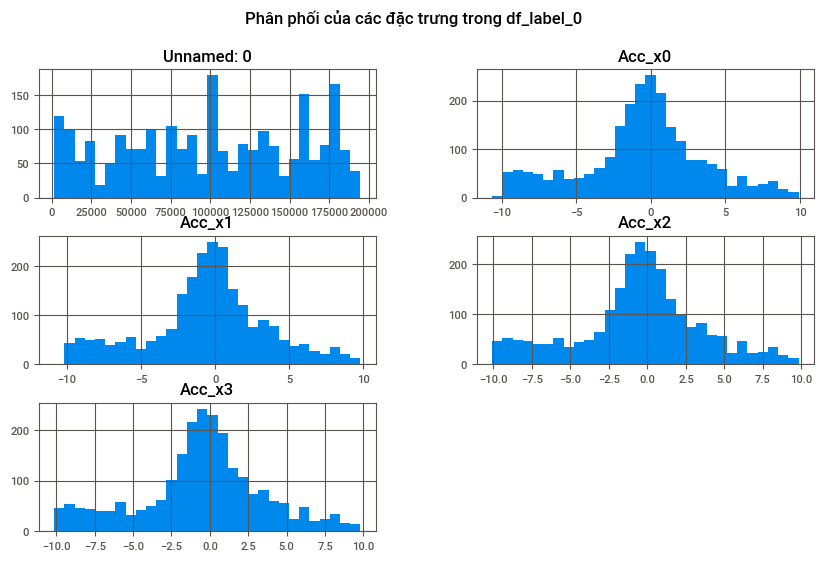

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df_label_0 đã được tạo
# 1. Kiểm tra cấu trúc của DataFrame
print("Cấu trúc của df_label_0:")
print(df_label_0.info())

# 2. Tính toán thống kê mô tả
print("\nThống kê mô tả:")
print(df_label_0.describe())

# 3. Kiểm tra giá trị missing
missing_values = df_label_0.isnull().sum()
print("\nSố lượng missing values trong mỗi cột:")
print(missing_values[missing_values > 0])

# 4. Phân tích phân phối của các đặc trưng
# Vẽ biểu đồ phân phối cho các đặc trưng đầu tiên (ví dụ 5 cột đầu tiên)
df_label_0.iloc[:, :5].hist(bins=30, figsize=(10, 6))
plt.suptitle('Phân phối của các đặc trưng trong df_label_0')
plt.show()

# Hoặc sử dụng seaborn để vẽ biểu đồ phân phối cho một cột cụ thể
# sns.histplot(df_label_0['tên_cột_cần_phân_tích'], kde=True)
# plt.title('Phân phối của tên_cột_cần_phân_tích')
# plt.show()